In [28]:
import sys
sys.path.append('../')
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from machinelearning.mlpipeline import MLPipelines

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##### Load data and initialize `MLPipelines` class

In [34]:
csv_dir = "../data/ce_ms.csv"
label = "group"

mlpipe = MLPipelines(label=label, csv_dir=csv_dir)
print(mlpipe)

Label mapping: {0: 'Factor1:CASE', 1: 'Factor1:CONTROL'}
There is no selected classifier.
Number of rows: 78 
Number of columns: 330


##### Perform model selection using **Nested Cross Validation**

Outer fold of 1 round:  0% |             | Elapsed Time: 0:00:00 ETA:  --:--:--
Outer fold of 1 round: 33% |████▎        | Elapsed Time: 0:00:05 ETA:   0:00:10
Outer fold of 1 round: 66% |████████▋    | Elapsed Time: 0:00:10 ETA:   0:00:05
Outer fold of 1 round:100% |█████████████| Elapsed Time: 0:00:11 Time:  0:00:11


Finished with 1 round after 0.00 hours.
Finished with 4 estimators
No features were selected.


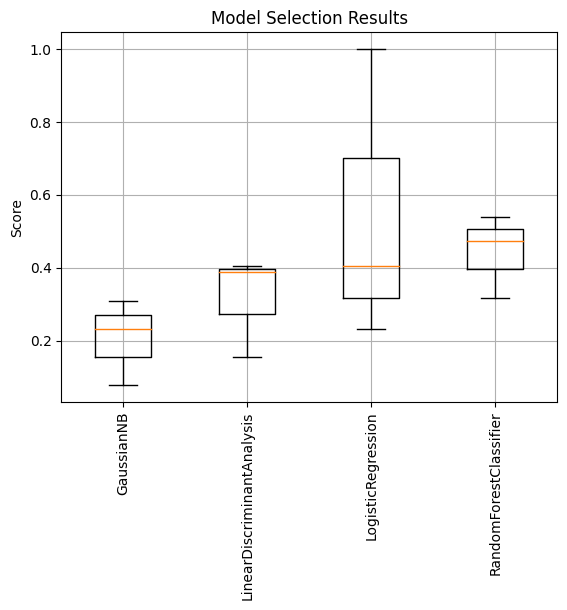

In [36]:
scores, features_list, all_featues = mlpipe.nested_cv(include=[RandomForestClassifier(), LinearDiscriminantAnalysis(), LogisticRegression(), GaussianNB()],
                                                      inner_splits=3, outer_splits=3, n_trials_ncv=10, n_iter=3, rounds=1, feature_selection_method=None)

In [37]:
mlpipe.normalize()

Converting the raw data with minmax normalization method....
Normalization completed.


In [38]:
# Create a parameter grid for XGBoost classifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

mlpipe.estimator = XGBClassifier()
mlpipe.param_grid = param_grid

print('Training with RandomizedSearchCV:')
mlpipe.random_search()
print()
print('Training with GridSearchCV:')
mlpipe.grid_search()

Training with RandomizedSearchCV:


KeyboardInterrupt: 

In [26]:
mlpipe.bayesian_search()

  0%|          | 0/100 [00:00<?, ?it/s]

Best parameters: {'var_smoothing': 8.09024965902995e-06}
Best matthews_corrcoef: 0.14512225245506513
